# Support Vector Machines

SVM is a linear model used for classification. This approach to prediction uses the same linear functional form as we saw for regression. But instead of predicting a continuous target value, we take the output of the linear function and apply the sign function to produce a binary output with two possible values, corresponding to the two possible class labels. 

The input variables are fed into the linear classifier and then applied a sign function that gives a value of $+1$ if the output is $>0$ or $-1$ if $<0$. This can be represented as $x \to f \to \hat{y}$ 

$ f = sign(w.x +b)$

where the dot product $ w.x = (w_1,w_2).(x_1,x_2)$ yields $w_1x_1 + w_2x_2$

and $b$ is the bias term or the intercept

#### Example linear function
For example, let the linear classifier be $ x_1 - x_2 = 0$ where, $w_1 = 1, w_2 = -1, b = 0$
![SVM](https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/svm.PNG?raw=true)
![SVM2](https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/svm2.png?raw=true)

#### Classifier Margins
One way to define a good classifier is to reward classifiers for the amount of separation that can provide between the two classes. _**The margin** is the width that the decision boundary can be increased before hitting a data point._
![SVM](https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/classifier%20margin.PNG?raw=true)

So by defining this concept of margin quantifies the degree to which the classifier can split the classes into two regions that have some amount of separation between them. We can search for the classifier that has the maximum margin. This **maximum margin** classifier is called the **Linear Support Vector Machine**, also known as an **LSVM or a support vector machine with linear kernel**.

### 1. Import Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### 2. Datasets

<IPython.core.display.Javascript object>


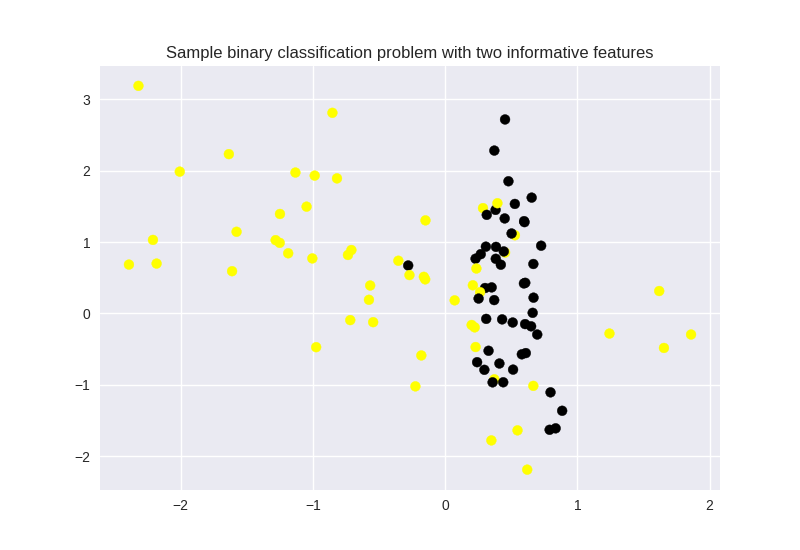

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

### 3. Support Vector Machines

#### Linear Support Vector Machine

<IPython.core.display.Javascript object>


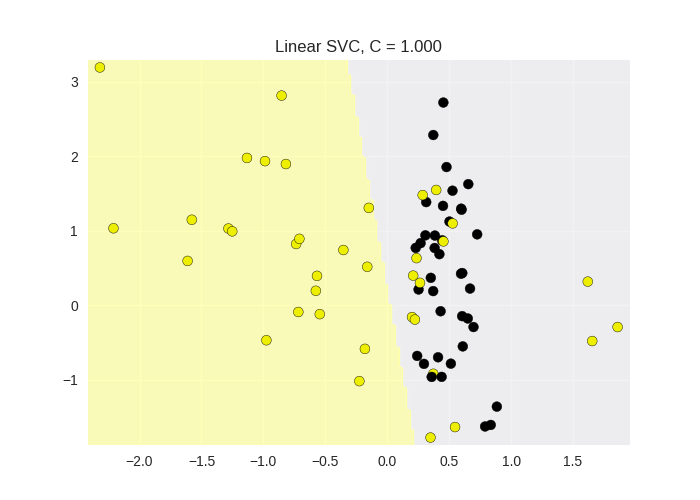

In [3]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

## Regularization Parameter $C$

So how tolerant the support vector machine is of misclassifying training points, as compared to its objective of minimizing the margin between classes is controlled by a **regularization parameter** called $C$ which by default is set to $1.0$

* Very Large $C \to$ less Regularization $\to$ overfitting

* Very Small $C \to$ More Regularization $\to $ underfitting


#### LSVM response to variation in  $C$ parameter

<IPython.core.display.Javascript object>


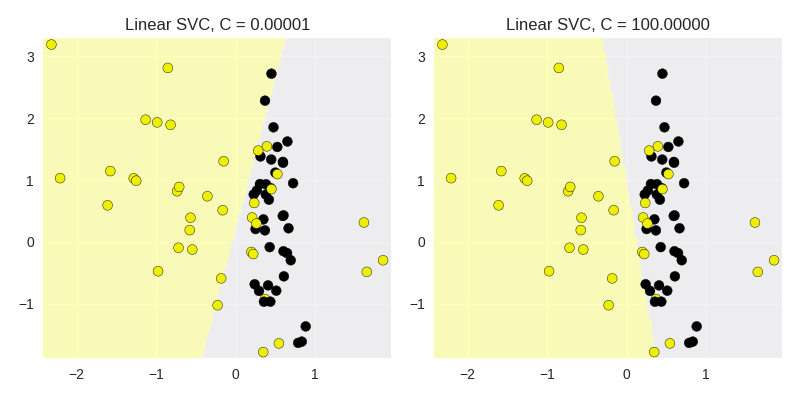

In [4]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Application to real dataset

In [5]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.88
Accuracy of Linear SVC classifier on test set: 0.86


we can see that it achieves reasonable accuracy without much parameter tuning. 

### Pros of linear models
* In case of linear and logistic regression they are **simple and easy to train**
* For all types of linear models, **prediction is fast because**, of the linear nature of the prediction function. 
* Linear models including Linear Support Vector Machines (LSVM) also **perform effectively on high demensional data set**, especially, in cases where the data instances are sparse. 
* Linear Models **scale well** to very large datasets.
* In the case of LSVM, subset of training points in decision function are used. These training points are called **support vectors**, so the algorithm can be implemented in a **memory efficient** way. 